In [ ]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import Normalizer
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# Data Train

In [ ]:
data_train = pd.read_excel("https://github.com/AkbarFauzy/Machine-Learning-Dataset/blob/main/kendaraan_train%20(1).xlsx?raw=true")
data_train = data_train.set_index('id')
data_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,,,,,,,,,,,
1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0


# Data Test

In [ ]:
data_test = pd.read_excel('https://github.com/AkbarFauzy/Machine-Learning-Dataset/blob/main/kendaraan_test.xlsx?raw=true')
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,41,1,0,0,1-2 Tahun,Pernah,2630,78,20,0
47635,Pria,39,1,0,0,1-2 Tahun,Pernah,2630,124,200,0
47636,Pria,33,1,0,1,< 1 Tahun,Tidak,2630,152,152,0
47637,Wanita,71,1,0,0,1-2 Tahun,Pernah,2630,25,226,0


In [ ]:
data_test['Jenis_Kelamin'] = data_test['Jenis_Kelamin'].map({'Wanita':0,'Pria':1})
data_test['Umur_Kendaraan'] = data_test['Umur_Kendaraan'].map({'< 1 Tahun':0,'1-2 Tahun':1,'> 2 Tahun':2})
data_test['Kendaraan_Rusak'] = data_test['Kendaraan_Rusak'].map({'Tidak':0,'Pernah':1})

In [ ]:
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,22,1,52,0,1,1,32895,124,71,1
1,1,54,1,52,0,1,1,43388,124,198,0
2,0,24,1,52,0,1,1,45032,124,171,0
3,0,78,1,52,0,2,1,42825,26,208,1
4,0,45,1,52,0,1,1,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,41,1,0,0,1,1,2630,78,20,0
47635,1,39,1,0,0,1,1,2630,124,200,0
47636,1,33,1,0,1,0,0,2630,152,152,0
47637,0,71,1,0,0,1,1,2630,25,226,0


# Data Preprocessing

## Changing String Feature to Numeric

In [ ]:
data_train['Jenis_Kelamin'] = data_train['Jenis_Kelamin'].map({'Wanita':0,'Pria':1})
data_train['Umur_Kendaraan'] = data_train['Umur_Kendaraan'].map({'< 1 Tahun':0,'1-2 Tahun':1,'> 2 Tahun':2})
data_train['Kendaraan_Rusak'] = data_train['Kendaraan_Rusak'].map({'Tidak':0,'Pernah':1})

In [ ]:
data_train.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271391.000000,271617.000000,271427.000000,271525.000000,271602.000000,271556.000000,271643.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,0.540467,38.844336,0.997848,26.405410,0.458778,0.609801,0.504791,30536.683472,112.021567,154.286302,0.122471
std,0.498361,15.522487,0.046335,13.252714,0.498299,0.567478,0.499978,17155.000770,54.202457,83.694910,0.327830
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31646.000000,132.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Dealing with Null Value

In [ ]:
data_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

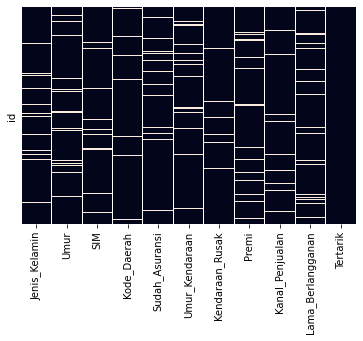

In [ ]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False)

### Filling Categorial Columns with Mode

In [ ]:
# Mengisi Categorial Features dengan Mode
data_train['Jenis_Kelamin'].fillna(value=data_train['Jenis_Kelamin'].mode()[0],inplace=True)
data_train['SIM'].fillna(value=data_train['SIM'].mode()[0],inplace=True)
data_train['Kode_Daerah'].fillna(value=data_train['Kode_Daerah'].mode()[0],inplace=True)
data_train['Sudah_Asuransi'].fillna(value=data_train['Sudah_Asuransi'].mode()[0],inplace=True)
data_train['Umur_Kendaraan'].fillna(value=data_train['Umur_Kendaraan'].mode()[0],inplace=True)
data_train['Kendaraan_Rusak'].fillna(value=data_train['Kendaraan_Rusak'].mode()[0],inplace=True)
data_train['Kanal_Penjualan'].fillna(value=data_train['Kanal_Penjualan'].mode()[0],inplace=True)

### Filling Nominal Columns with Mean

In [ ]:
# Mnegisi Nominal Features dengan Mode
data_train['Umur'].fillna(value=data_train['Umur'].mean(), inplace=True)
data_train['Premi'].fillna(value=data_train['Premi'].mean(), inplace=True)
data_train['Lama_Berlangganan'].fillna(value=data_train['Lama_Berlangganan'].mean(), inplace=True)

In [ ]:
data_train.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,0.563683,38.844336,0.997957,26.485220,0.435939,0.629288,0.529372,30536.683472,114.021530,154.286302,0.122471
std,0.495929,15.131608,0.045155,12.921482,0.495880,0.559618,0.499137,16712.080405,53.543345,81.620684,0.327830
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24929.000000,55.000000,85.000000,0.000000
50%,1.000000,38.000000,1.000000,28.000000,0.000000,1.000000,1.000000,30949.000000,152.000000,154.286302,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,38845.000000,152.000000,223.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

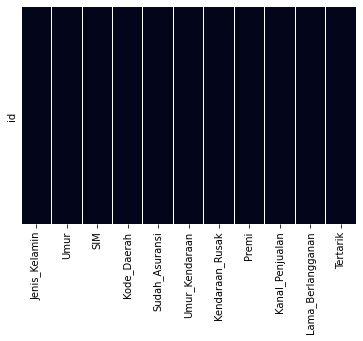

In [ ]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False)

## Dealing with Duplicate Value





In [ ]:
#Jumlah data Duplikat
data_train.duplicated().sum()

327

In [ ]:
# Menghapus Data duplikat
data_train = data_train.drop_duplicates()
data_train.duplicated().sum()

0

In [ ]:
data_train.shape

(285504, 11)

## Data Visualitation

In [ ]:
sns.pairplot(data_train,hue="Tertarik")

## Dealing with Outliers

### Mendeteksi Outlier

In [ ]:
# Scaling data untuk membandingkan Boxplot
scaler = MinMaxScaler()
scaler.fit(data_train)
scaled_data = scaler.transform(data_train)
scaled_data = pd.DataFrame(scaled_data, columns=data_train.columns)
scaled_data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285499,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
285500,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
285501,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
285502,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


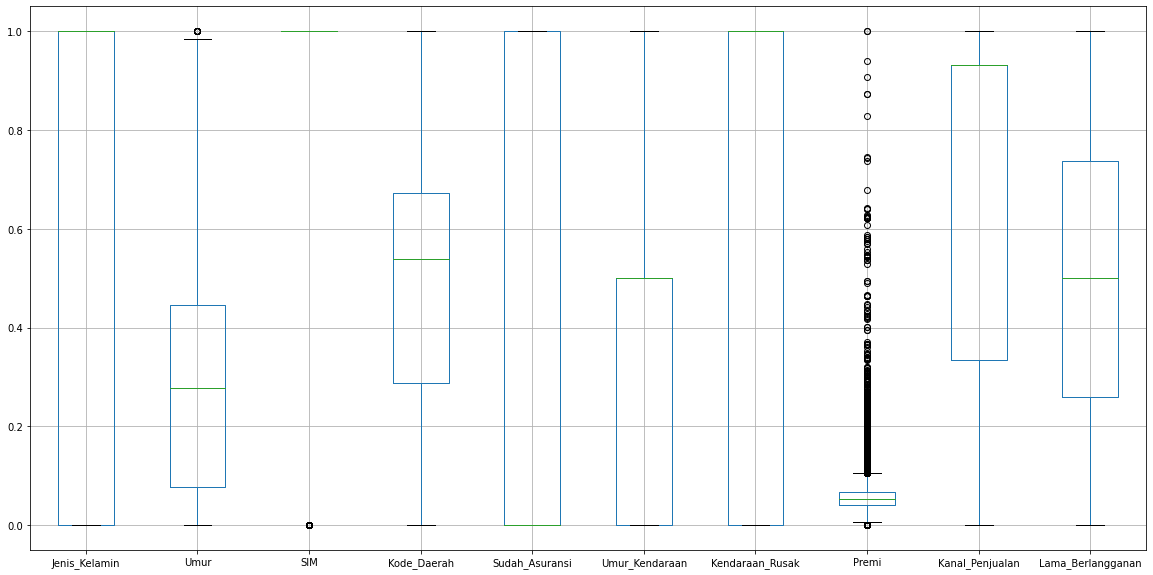

In [ ]:
pd.DataFrame(scaled_data).drop(columns=['Tertarik']).boxplot(figsize=(20,10))

In [ ]:
# Menghilangkan row yang memiliki outlier pada Premi
q1 = data_train['Premi'].quantile(0.25)
q2 = data_train['Premi'].quantile(0.50)
q3 = data_train['Premi'].quantile(0.75)
print("Q1 = ", q1, "Q2 = ",q2, " Q3 = ", q3)

iqr = q3 - q1
print("IQR = ", iqr)

lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

print("Lower Tail = ",lower_tail, " Upper Tail = ", upper_tail)

# data_train['Premi'] =  np.where((data_train["Premi"] > upper_tail), q2 , data_train['Premi'])
data_train = data_train.drop(data_train[(data_train["Premi"] > upper_tail) | (data_train["Premi"] < lower_tail)].index)

Q1 =  24947.0 Q2 =  30965.0  Q3 =  38857.0
IQR =  13910.0
Lower Tail =  4082.0  Upper Tail =  59722.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(data_train)
scaled_data = scaler.transform(data_train)
scaled_data = pd.DataFrame(scaled_data, columns=data_train.columns)
scaled_data

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(scaled_data).drop(columns=['Tertarik']).boxplot(figsize=(20,10))

## Data Correlation

In [ ]:
data_train.corr()

In [ ]:
#Korelasi antar Variabel di visualisasikan menggunakan heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data_train.corr(), annot=True, vmin=-1, vmax=1)

## Data Split

In [ ]:
# Splitting Data menjadai X_train, X_test, y_train, y_test
data = data_train
X, y = data.drop(columns=['Tertarik']).values, data.Tertarik.values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y_train)

## Data Balancing

In [ ]:
# Combination Balancing
over = RandomOverSampler(sampling_strategy=0.3)
X_train, y_train = over.fit_resample(X_train, y_train)

under = RandomUnderSampler(sampling_strategy=0.7)

X_train, y_train = under.fit_resample(X_train, y_train)

In [ ]:
# Oversampling Balancing data train menggunakan metode resample SMOTE
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y_train)

## Normalizing Data for Model

In [ ]:
# Normalisasi Data
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

# Random Forest Balanced Model

## Model Tuning

In [ ]:
# Jumlah tree pada random Forest
n_estimators = [50, 100, 200, 300]
# Jumlah Feature untuk dipertimbagkan pada setiap split
max_features = [0.5,'sqrt']
# Jumlah maximum kedalaman tree
max_depth = [24, 26, 28, 30]
# Jumlah minimum sample yang diperlukan untuk melakukan split
min_samples_split = [2]
# Jumlah minimum sample untuk setiap leaf
min_samples_leaf = [1, 2 ,3]
# Voting
bootstrap = [True]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
model = RandomForestClassifier()

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=4, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [24, 26, 28, 30],
                         'max_features': [0.5, 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=4)

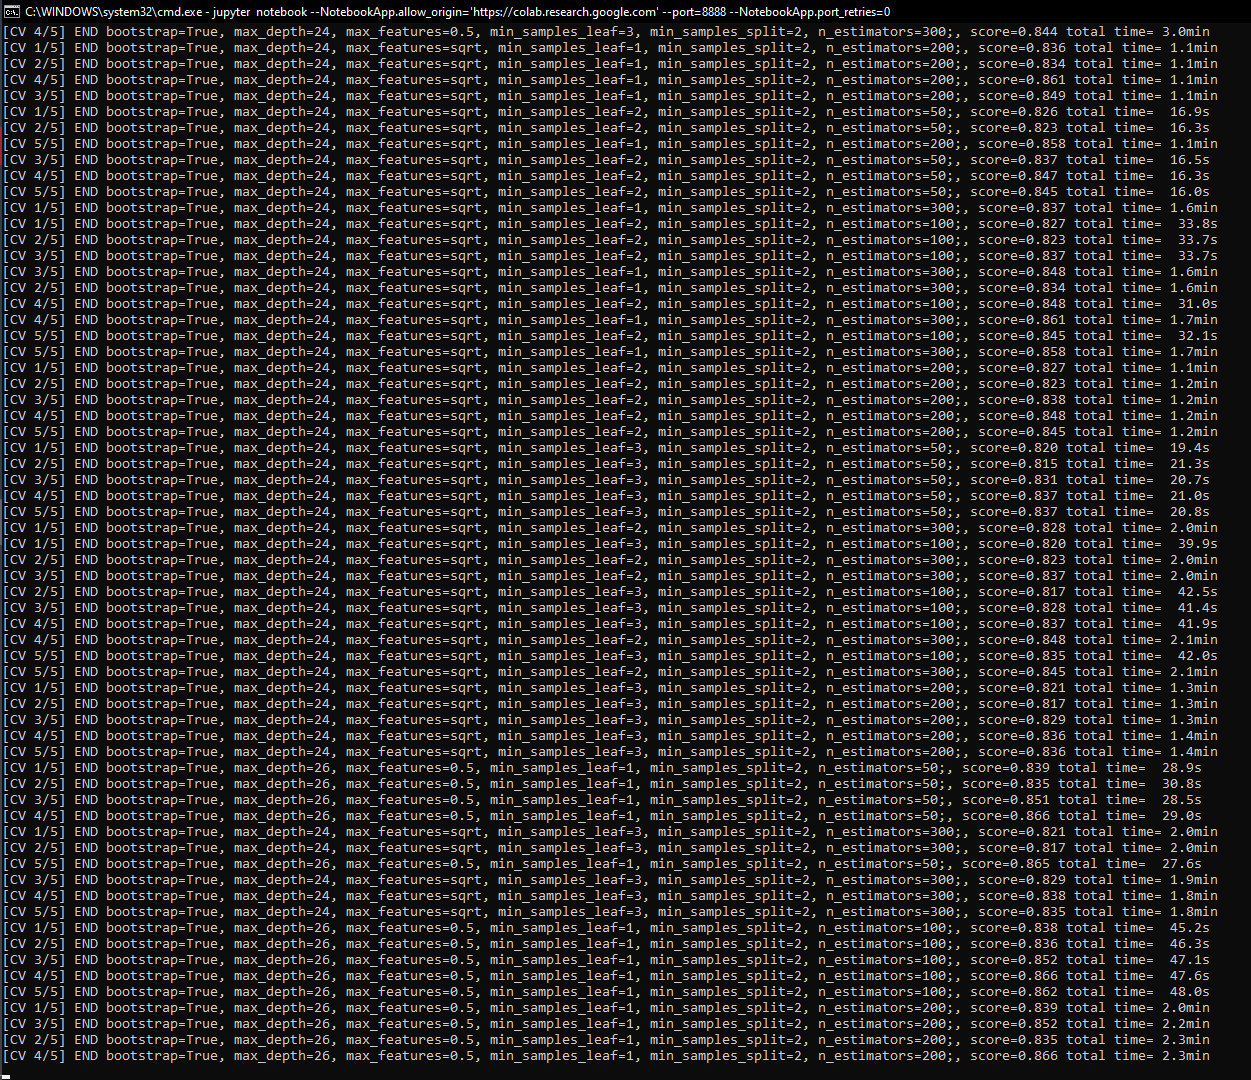

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

## Training Model

In [ ]:
final_model = RandomForestClassifier(max_depth=30,max_features=0.5, min_samples_leaf=1,min_samples_split=2, n_estimators=50,bootstrap=True)

In [ ]:
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=0.5, n_estimators=50)

# Evaluasi Random Forest Balanced Model 

## Split test Prediction Data

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7896482935079578


In [ ]:
print("Jumlah Prediksi Tidak Tertarik = ",pd.DataFrame(y_pred).value_counts()[0])
print("Jumlah Prediksi Tertarik = ",pd.DataFrame(y_pred).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik =  34729
Jumlah Prediksi Tertarik =  11389


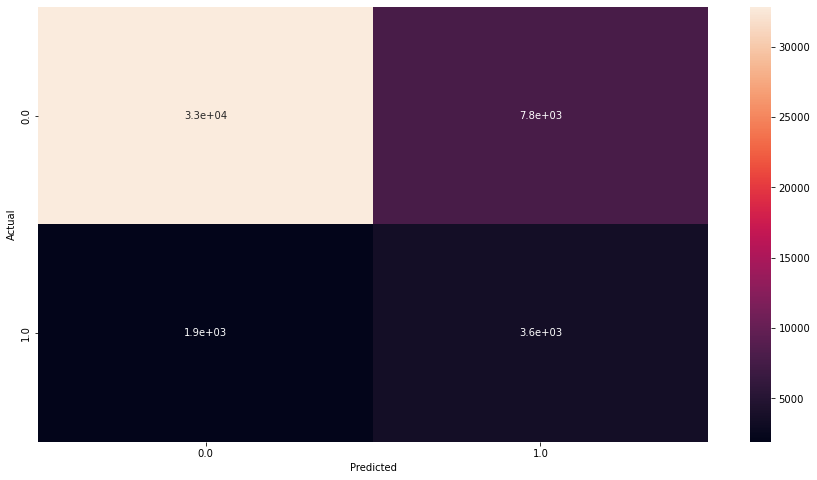

In [ ]:
data = {
    'y_Actual': y_test,
    'y_Predicted':y_pred
}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print(metrics.classification_report(data['y_Actual'], data['y_Predicted'], labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     40620
           1       0.32      0.65      0.43      5498

    accuracy                           0.79     46118
   macro avg       0.63      0.73      0.65     46118
weighted avg       0.87      0.79      0.82     46118



## Datasets Test Prediction

In [ ]:
X_test2 = data_test.drop(columns=['Tertarik'])
y_test2 = data_test['Tertarik']

X_test2 = scaler.transform(X_test2)

y_pred2 = final_model.predict(X_test2)
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.7871911669010685


In [ ]:
print("Jumlah Prediksi Tidak Tertarik = ",pd.DataFrame(y_pred2).value_counts()[0])
print("Jumlah Prediksi Tertarik = ",pd.DataFrame(y_pred2).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik =  36192
Jumlah Prediksi Tertarik =  11447


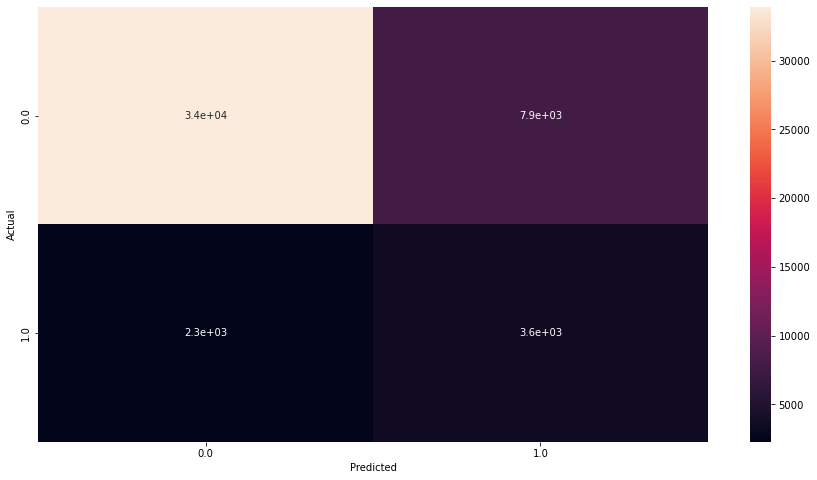

In [ ]:
data_predict2 = {
    'y_Actual': y_test2,
    'y_Predicted':y_pred2
}
df = pd.DataFrame(data_predict2, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print(metrics.classification_report(data_predict2['y_Actual'], data_predict2['y_Predicted'], labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     41778
           1       0.31      0.61      0.41      5861

    accuracy                           0.79     47639
   macro avg       0.63      0.71      0.64     47639
weighted avg       0.86      0.79      0.81     47639



# Random Forest Imbalanced Model

## Load Imbalanced Datasets

In [ ]:
# Splitting Data menjadai X_train, X_test, y_train, y_test
data = data_train
X, y = data.drop(columns=['Tertarik']).values, data.Tertarik.values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

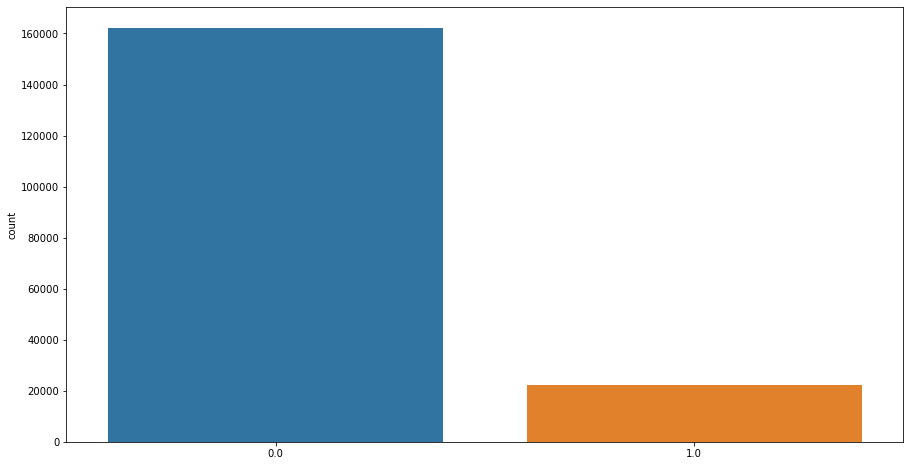

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y_train)

In [ ]:
# Normalisasi Data
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(184469, 10)

## Model Tuning


In [ ]:
model2 = RandomForestClassifier()

grid = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 5, verbose=4, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [24, 26, 28, 30],
                         'max_features': [0.5, 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=4)

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 24,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

## Training Model

In [ ]:
imbalanced_model = RandomForestClassifier(max_depth=24,max_features='sqrt', min_samples_leaf=3,min_samples_split=2, n_estimators=200,bootstrap=True)

In [ ]:
imbalanced_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=24, max_features='sqrt', min_samples_leaf=3,
                       n_estimators=200)

# Evaluasi Random Forest Imbalanced Model

## Split Test Prediction data

In [ ]:
y_pred = imbalanced_model.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8773580814432542


In [ ]:
print("Jumlah Prediksi Tidak Tertarik = ",pd.DataFrame(y_pred).value_counts()[0])
print("Jumlah Prediksi Tertarik = ",pd.DataFrame(y_pred).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik =  45769
Jumlah Prediksi Tertarik =  349


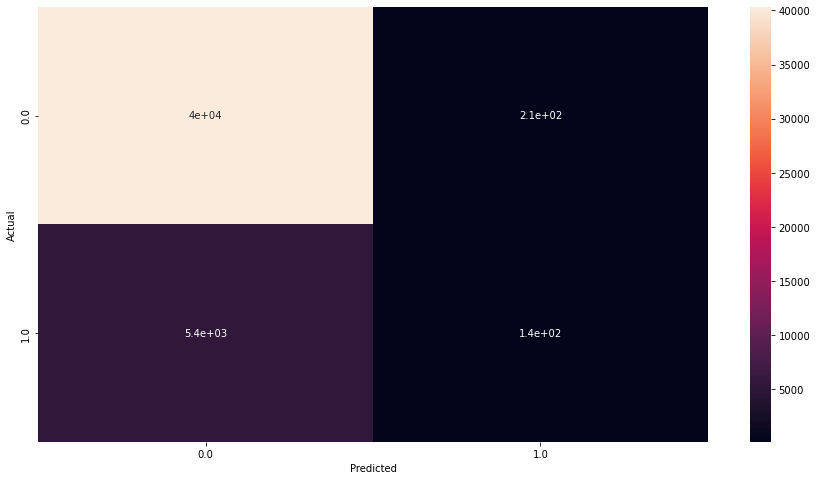

In [ ]:
data = {
    'y_Actual': y_test,
    'y_Predicted':y_pred
}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print(metrics.classification_report(data['y_Actual'], data['y_Predicted'], labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     40537
           1       0.39      0.02      0.05      5581

    accuracy                           0.88     46118
   macro avg       0.64      0.51      0.49     46118
weighted avg       0.82      0.88      0.83     46118



## Datasets Tests Prediction

In [ ]:
X_test2 = data_test.drop(columns=['Tertarik'])
y_test2 = data_test['Tertarik']

X_test2 = scaler.transform(X_test2)

y_pred2 = imbalanced_model.predict(X_test2)
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8757110770587124


In [ ]:
print("Jumlah Prediksi Tidak Tertarik = ",pd.DataFrame(y_pred2).value_counts()[0])
print("Jumlah Prediksi Tertarik = ",pd.DataFrame(y_pred2).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik =  47211
Jumlah Prediksi Tertarik =  428


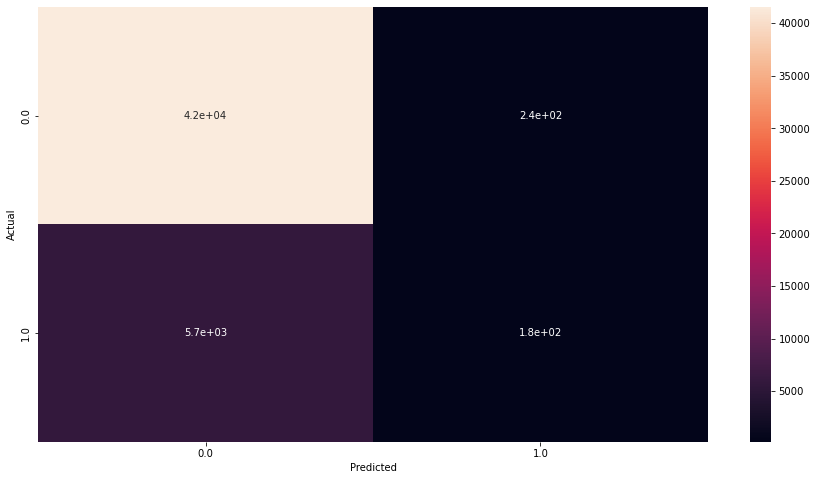

In [ ]:
data_predict2 = {
    'y_Actual': y_test2,
    'y_Predicted':y_pred2
}
df = pd.DataFrame(data_predict2, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print(metrics.classification_report(data_predict2['y_Actual'], data_predict2['y_Predicted'], labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.43      0.03      0.06      5861

    accuracy                           0.88     47639
   macro avg       0.65      0.51      0.50     47639
weighted avg       0.82      0.88      0.83     47639



# ------------------------

In [ ]:
# def entropy(y):
#     y = y.astype(int)
#     hist = np.bincount(y)
#     ps = hist / len(y)
#     return -np.sum([p * np.log2(p) for p in ps if p > 0])

# class Node:
#     def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
#         self.feature = feature
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.value = value

#     def is_leaf_node(self):
#         return self.value is not None

# class DecisionTree:
#     def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
#         self.min_samples_split = min_samples_split
#         self.max_depth = max_depth
#         self.n_feats = n_feats
#         self.root = None

#     def fit(self, X, y):
#         self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
#         self.root = self._grow_tree(X, y)

#     def predict(self, X):
#         return np.array([self._traverse_tree(x, self.root) for x in X])

#     def _grow_tree(self, X, y, depth=0):
#         n_samples, n_features = X.shape
#         n_labels = len(np.unique(y))

#         # stopping criteria
#         if ( depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
#             leaf_value = self._most_common_label(y)
#             return Node(value=leaf_value)

#         feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

#         # greedily select the best split according to information gain
#         best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

#         # grow the children that result from the split
#         left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
#         left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
#         right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
#         return Node(best_feat, best_thresh, left, right)

#     def _best_criteria(self, X, y, feat_idxs):
#         best_gain = -1
#         split_idx, split_thresh = None, None
#         for feat_idx in feat_idxs:
#             X_column = X[:, feat_idx]
#             thresholds = np.unique(X_column)
#             for threshold in thresholds:
#                 gain = self._information_gain(y, X_column, threshold)

#                 if gain > best_gain:
#                     best_gain = gain
#                     split_idx = feat_idx
#                     split_thresh = threshold

#         return split_idx, split_thresh

#     def _information_gain(self, y, X_column, split_thresh):
#         # parent loss
#         parent_entropy = entropy(y)

#         # generate split
#         left_idxs, right_idxs = self._split(X_column, split_thresh)

#         if len(left_idxs) == 0 or len(right_idxs) == 0:
#             return 0

#         # compute the weighted avg. of the loss for the children
#         n = len(y)
#         n_l, n_r = len(left_idxs), len(right_idxs)
#         e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
#         child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

#         # information gain is difference in loss before vs. after split
#         ig = parent_entropy - child_entropy
#         return ig

#     def _split(self, X_column, split_thresh):
#         left_idxs = np.argwhere(X_column <= split_thresh).flatten()
#         right_idxs = np.argwhere(X_column > split_thresh).flatten()
#         return left_idxs, right_idxs

#     def _traverse_tree(self, x, node):
#         if node.is_leaf_node():
#             return node.value

#         if x[node.feature] <= node.threshold:
#             return self._traverse_tree(x, node.left)
#         return self._traverse_tree(x, node.right)

#     def _most_common_label(self, y):
#         counter = Counter(y)
#         most_common = counter.most_common(1)[0][0]
#         return most_common

# def accuracy(y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy

In [ ]:
# clf = DecisionTree(max_depth=10)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# acc = accuracy(y_test, y_pred)

# print("Accuracy:", acc)

In [ ]:
# print(pd.DataFrame(y_pred).value_counts())

In [ ]:
# wrong_pred = 0
# for i in range(len(y_pred)):
#   if y_test[i] != y_pred[i]:
#     wrong_pred+=1

# print("Wrong prediction:",wrong_pred, "From", len(y_pred))

In [ ]:
# test2 = data_test.drop(columns=['Tertarik']).to_numpy()
# test2_label = data_test['Tertarik']

# y_pred_data_test = clf.predict(test2)
# acc2 = accuracy(test2_label, y_pred_data_test)

# print("Accuracy:", acc2)

In [ ]:
# print(pd.DataFrame(y_pred_data_test).value_counts())

In [ ]:
# wrong_pred = 0
# for i in range(len(y_pred_data_test)):
#   if test2_label[i] != y_pred_data_test[i]:
#     wrong_pred+=1

# print("Wrong prediction:",wrong_pred, "From", len(y_pred))